### MEMO_0804 (v0804_1.0)

### _* Memo_0804_1_

In [1]:
from datetime import datetime


def get_candidated(version: str):
    """ get_candidated """
    query = f'select n0, n1, n2, n3, n4, n5 from candidated where version=\\"{version}\\";'
    metrics = !echo "{query}" | sqlite3 ../db/metrics.db
    if len(metrics) == 1:
        metrics = metrics[0].split('|')
        if len(metrics) == 6:
            return {0: int(metrics[0]),
                    1: int(metrics[1]),
                    2: int(metrics[2]),
                    3: int(metrics[3]),
                    4: int(metrics[4]),
                    5: int(metrics[5])}
    return {}


def update_candidated(candidated: dict, version: str):
    """ update_candidated """
    sel_query = f'select * from candidated where version=\\"{version}\\";'
    metrics = !echo "{sel_query}" | sqlite3 ../db/metrics.db
    if len(metrics) == 1:
        """ update """
        update_query = 'update candidated set '
        set_kv = []
        for key in candidated.keys():
            set_kv.append(f'n{key}={candidated[key]}')
        update_query += ", ".join(set_kv)
        update_query += f' where version=\\"{version}\\";'
        !echo "{update_query}" | sqlite3 ../db/metrics.db
    else:
        """ insert """
        insert_query = 'insert into candidated ('
        new_key = []
        new_val = []
        for key in candidated.keys():
            new_key.append(f'n{key}')
            new_val.append(f'{candidated[key]}')
        new_key.append('version')
        new_val.append(f'\\"{version}\\"')
        insert_query += f'{", ".join(new_key)} ) values ('
        insert_query += f'{", ".join(new_val)} );'
        !echo "{insert_query}" | sqlite3 ../db/metrics.db


def create_candidated():
    """ create_candidated """
    new_query = 'create table candidated ( ' \
                ' id INTEGER PRIMARY KEY AUTOINCREMENT, ' \
                ' version char[14], ' \
                ' n0 int, ' \
                ' n1 int, ' \
                ' n2 int, ' \
                ' n3 int, ' \
                ' n4 int, ' \
                ' n5 int );'
    !echo "{new_query}" | sqlite3 ../db/metrics.db


# create_candidated()
print(f'code defined {datetime.now()}')

code defined 2025-08-07 18:15:46.533818


In [2]:
version="memo_0804_7"
candidate = get_candidated(version=version)
if len(candidate.keys()) == 0:
    candidate = {0:1, 1:13, 2:21, 3:25, 4:28, 5:31}
next_round = 1183
print('candidate = ', candidate)


candidate =  {0: 1, 1: 13, 2: 21, 3: 25, 4: 28, 5: 31}


In [3]:
## this code was run.
#!pip install keras-tuner
# import numpy as np
# import pandas as pd
import os
from datetime import datetime
from tqdm import tqdm
# print(f'Current Step #01 [now = {datetime.now()}')
from IPython.display import Markdown

from lib.analy_util import ( draw_markdown,
                             draw_graph,
                             draw_scatter,
                             get_pre_bef,
                             draw_average,
                             get_frequency,
                             get_information,
                             analyze_v1,
                             data_prepare,
                             search_model,
                             get_information_v2,
                             get_extdatas,
                             )
print(f'define this code. [{datetime.now()}]')


title = "Metrics"
row_length = 400
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 20

define this code. [2025-08-07 18:15:50.122541]
define this code. [2025-08-07 18:15:50.122750]


In [4]:
query = 'select round, metric, bonus from results'
query += f' order by round desc '
query += f'limit 1'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
cols = rows[0].split('|')
latest_nums = [int(i) for i in cols[1].split(',')]

print('latest_nums = ', latest_nums)

latest_nums =  [4, 15, 17, 23, 27, 36]


In [5]:
# Display the variable's value in Markdown
contents = f"###### Updated {datetime.now()}\n\n### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
candidate_strs = [f"{i}" for i in candidate.values()]
skip_first = True
for row in rows:
    if skip_first:
        row = f"{next_round}|{",".join(candidate_strs)}|0"
        skip_first = False
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str + "\n" + f"###### Updated {datetime.now()}"
Markdown(contents)

row's len = 400


###### Updated 2025-08-07 18:15:50.145779

### Metrics
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1183|01,13,21,25,28,31|0|119|1|1|3|1|0|
|1183|04,15,17,23,27,36|31|122|1|2|2|1|0|
|1182|01,13,21,25,28,31|22|119|1|1|3|1|0|
|1181|08,10,14,20,33,41|28|126|1|2|1|1|1|
|1180|06,12,18,37,40,41|3|154|1|2|0|1|2|
|1179|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
###### Updated 2025-08-07 18:15:50.155743

In [6]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
def get_likey(like_query, next_round):
    rows = !echo "{like_query}" | sqlite3 ../db/metrics.db
    cur_next_round = next_round
    if len(rows) > 0:
        for row in rows:
            cols = row.split("|")
            nums = [int(i) for i in cols[2].split(',')]
            nums_str = [f"{int(i): >2}" for i in nums]
            round_diff = 0
            cur_round = int(cols[1])        
            if next_round > 0:
                round_diff = cur_next_round - cur_round
            cur_next_round = cur_round
            print(f"{cur_round: >4} | {','.join(nums_str)} | {sum(nums): >3} | {round_diff: >3}")
    else:
        print('data is empty.')

In [7]:
# 기준이 되는 수에 대한 DB의 기존 데이터를 출력합니다.
like_query = 'select * from results where metric like \\"4,%,%,%,%,45\\" order by round desc;'
get_likey(like_query, next_round)

1137 |  4, 9,12,15,33,45 | 118 |  46
1079 |  4, 8,18,24,37,45 | 136 |  58
1061 |  4,24,27,35,37,45 | 172 |  18
 939 |  4,11,28,39,42,45 | 169 | 122
 884 |  4,14,23,28,37,45 | 151 |  55
 829 |  4, 5,31,35,43,45 | 163 |  55
 761 |  4, 7,11,24,42,45 | 133 |  68


In [8]:
"""
data preparation
"""

#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

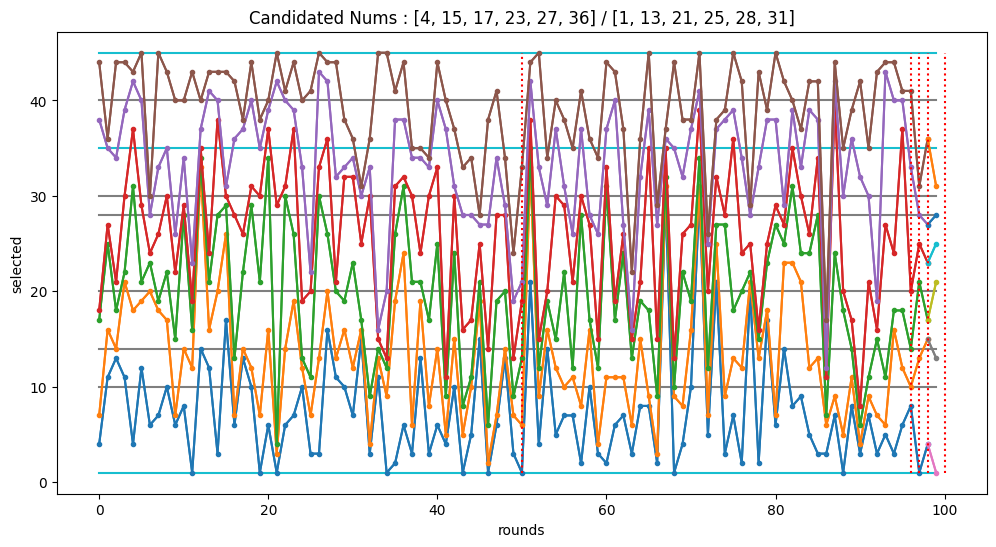

In [9]:
ext_datas = []

for key in candidate:
    ext_datas.append((key, candidate[key]))

# show_cols = [0, 1, 2, 3, 4, 5]
show_cols = [0, 1, 2, 3, 4, 5]
show_label = False
show_cnt = 100

start_pos = row_length - show_cnt

show_data = []
for i in range(6):
    show_data.append(row_list[i][start_pos:])

vline_poses = []
for i in range(1, show_cnt // 50 +1):
    vline_poses.append((50*i, 0, 45))

draw_scatter(Y=show_data,
             title=f'Candidated Nums : {latest_nums} / {list(candidate.values())}',
             show_line=True,
             show_dot=True,
             show_cols=show_cols,
             ext_datas=ext_datas,
             show_label=show_label,
             helper_line_nums=[1, 10, 14, 20, 28, 30, 35, 40, 45],
             marker_size=3,
             fig_size=(12,6),
             save_fig=False,
             show_time=False,
             vline_poses=vline_poses
            )


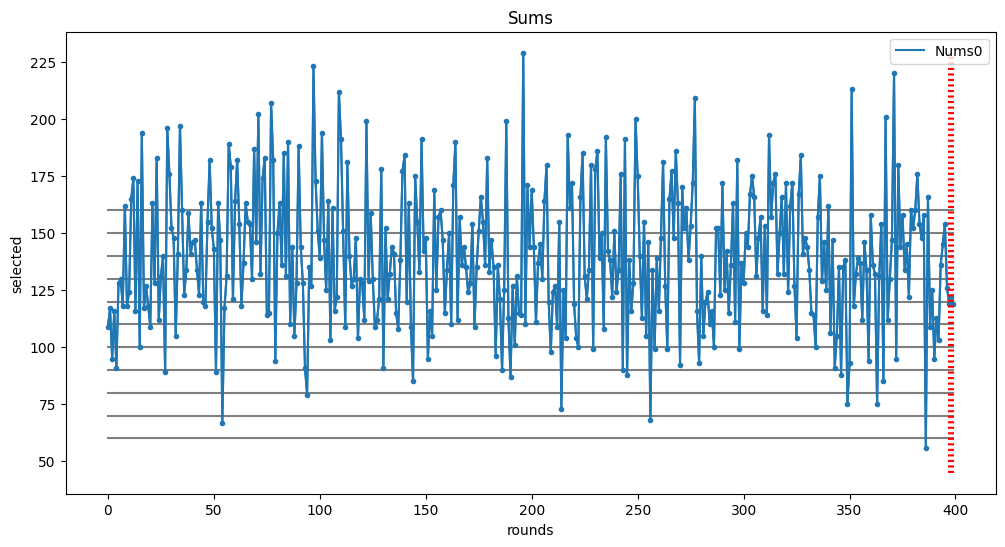

candidate =  119
candidate =  dict_values([1, 13, 21, 25, 28, 31])
last      =  [109, 117, 95, 116, 91, 128, 130, 118, 162, 118, 124, 165, 174, 116, 173, 100, 194, 117, 127, 118, 109, 163, 128, 183, 112, 131, 140, 89, 196, 176, 152, 148, 105, 141, 197, 160, 123, 134, 159, 141, 146, 147, 134, 123, 163, 120, 118, 155, 182, 152, 143, 89, 163, 147, 67, 117, 131, 189, 179, 121, 164, 182, 154, 118, 137, 163, 155, 154, 130, 187, 146, 202, 132, 174, 183, 114, 115, 207, 182, 94, 150, 163, 136, 185, 131, 190, 110, 144, 105, 128, 188, 144, 128, 91, 79, 135, 127, 223, 173, 151, 139, 194, 147, 125, 164, 103, 161, 116, 122, 212, 191, 151, 109, 181, 140, 127, 130, 148, 104, 130, 128, 112, 199, 129, 159, 130, 109, 112, 121, 178, 91, 152, 121, 132, 144, 141, 115, 108, 138, 177, 184, 120, 163, 109, 85, 175, 155, 133, 191, 142, 148, 95, 116, 105, 169, 125, 157, 160, 147, 115, 134, 150, 110, 171, 190, 112, 157, 136, 144, 135, 124, 128, 154, 109, 135, 151, 166, 155, 136, 183, 133, 147, 135, 96, 136, 121, 9

In [10]:
s1 = sums[:-1] + [sum(candidate.values())]
draw_scatter([s1], f'Sums', helper_line_nums=[60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160])
print('candidate = ', sum(candidate.values()))
print('candidate = ', candidate.values())
print('last      = ', sums[:-1])

before   = 0
ext_data = 1
after    = 13


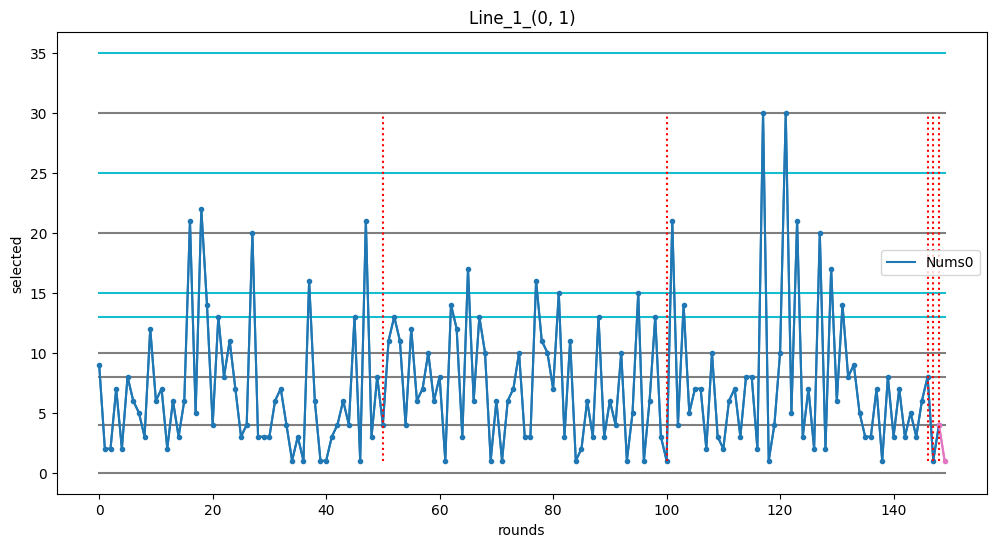

최소 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 30]
최대 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 30]
사용자 선택       = 1
마지막 값        = 4
마지막 값들       = [4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 5, 3, 6, 8, 1, 4]
자주 나오는 값(부분) = [(22, 1), (9, 2), (20, 2), (16, 2), (17, 2), (15, 2), (30, 2), (12, 3), (21, 4), (14, 4), (11, 5), (13, 6), (5, 7), (10, 7), (8, 9), (2, 10), (4, 11), (7, 13), (1, 15), (6, 18), (3, 24)]
자주 나오는 값(전체) = [(23, 1), (27, 1), (26, 1), (18, 2), (22, 2), (30, 2), (20, 3), (19, 4), (15, 5), (17, 7), (16, 7), (21, 7), (11, 9), (14, 13), (13, 13), (12, 16), (10, 16), (9, 16), (8, 20), (5, 27), (7, 27), (4, 28), (6, 32), (2, 43), (1, 47), (3, 50)]
마지막 수의 앞과 뒤 #1 = [[-1, 4, 12], [5, 4, 4], [4, 4, 5], [8, 4, 11], [7, 4, 18], [9, 4, 1], [9, 4, 1], [1, 4, 5], [10, 4, 3], [1, 4, 7], [2, 4, 4], [4, 4, 3], [2, 4, 7], [1, 4, 10], [10, 4, 2], [7, 4, 2], [6, 4, 13], [14

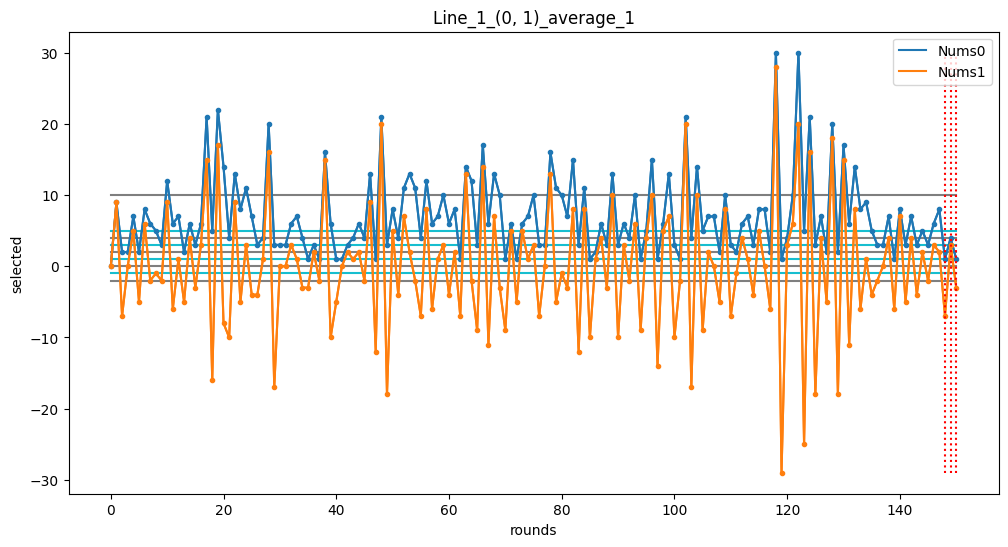

________________________________________
최소값          = [4.0, 4.1, 4.2, 4.3, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]
최대값          = [8.9, 9.0, 9.1, 9.2, 9.3, 9.6, 9.7, 10.0, 10.1, 10.2, 10.3, 10.4, 10.6, 10.7, 10.8, 11.1, 11.3, 11.4, 11.7, 11.9]
마지막          = [11.3, 9.7, 10.0, 8.8, 9.0, 8.6, 8.7, 7.4, 7.3, 6.4, 6.1, 5.4, 4.9, 4.5, 4.3, 4.6, 5.1, 4.5, 4.8, 4.1]


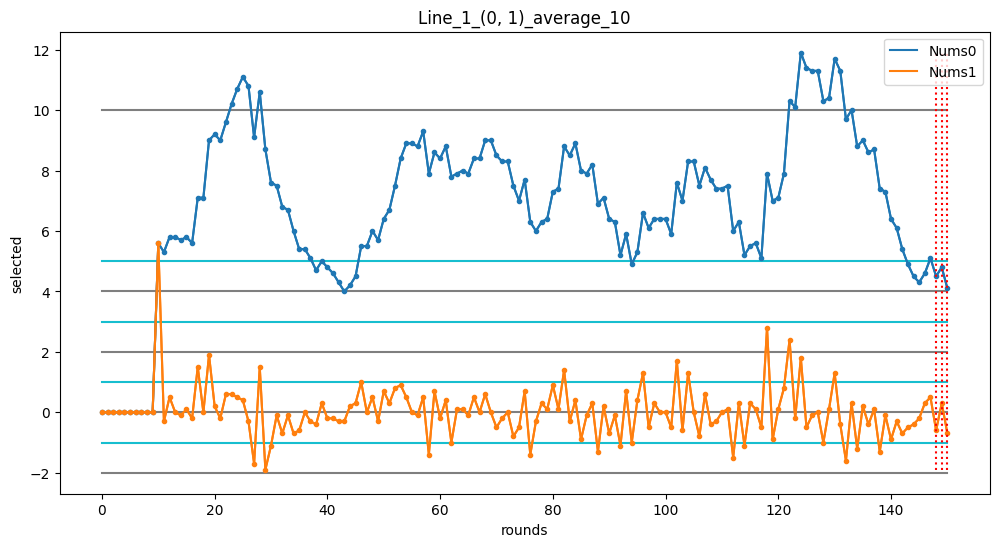

________________________________________
최소값          = [4.95, 5.1, 5.25, 5.3, 5.35, 5.45, 5.55, 5.6, 5.65, 5.9, 5.95, 6.05, 6.1, 6.2, 6.4, 6.45, 6.55, 6.6, 6.65, 6.7]
최대값          = [8.15, 8.2, 8.25, 8.35, 8.4, 8.45, 8.55, 8.6, 8.7, 8.8, 8.85, 9.05, 9.1, 9.4, 9.6, 9.95, 10.0, 10.05, 10.2, 10.35]
마지막          = [9.6, 10.0, 10.05, 10.35, 10.2, 9.95, 10.0, 8.85, 8.85, 9.05, 8.7, 7.55, 7.45, 6.65, 6.65, 6.6, 6.9, 5.95, 6.05, 5.25]


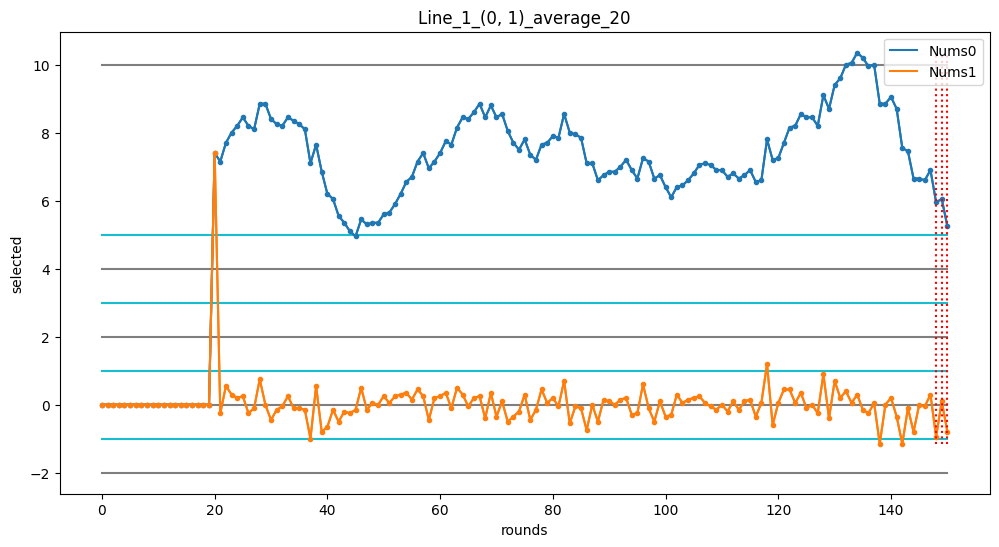

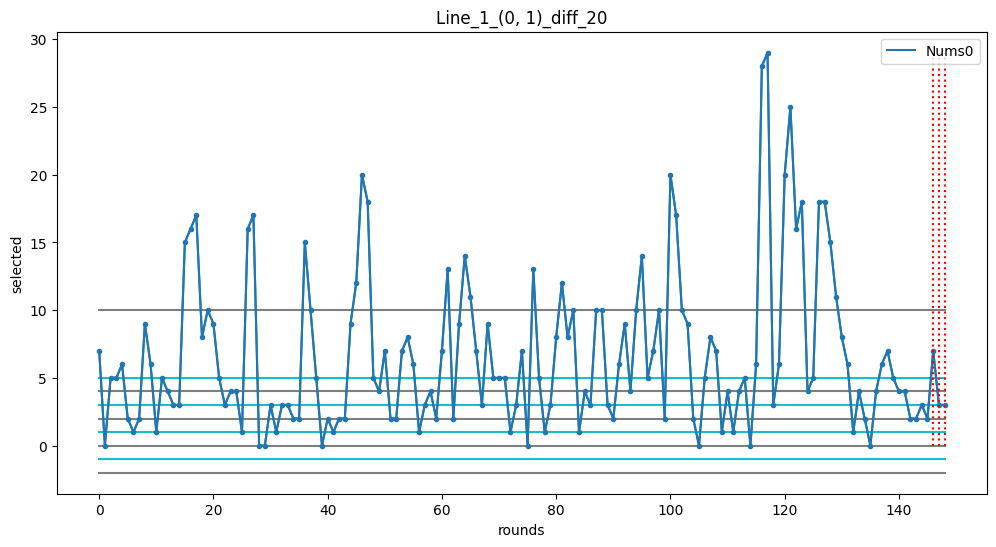

In [11]:
Round = 1
############################
selected = Round - 1
ext_data = 1

before = 0
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [0, 4, 8, 10, 13, 15, 20, 25, 30, 35]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-2, -1, 0, 1, 2, 3, 4, 5, 10]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 250
vline_poses = []
for i in range(1, (len(row_list_none_last[selected]) - start_pos_0) // 50 +1):
    vline_poses.append((50*i, 0, 45))
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = False
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums,
                   vline_color="red",
                   vline_poses=vline_poses
                   # vline_poses=[(50, 0, 45), (100, 0, 45), (150, 0, 45), (200, 0, 45), (250, 0, 45)]
                   # vline_poses=[(50, 0, 45), (100, 0, 45), (150, 0, 45), (200, 0, 45), (250, 0, 45)]
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

before   = 1
ext_data = 6
after    = 21


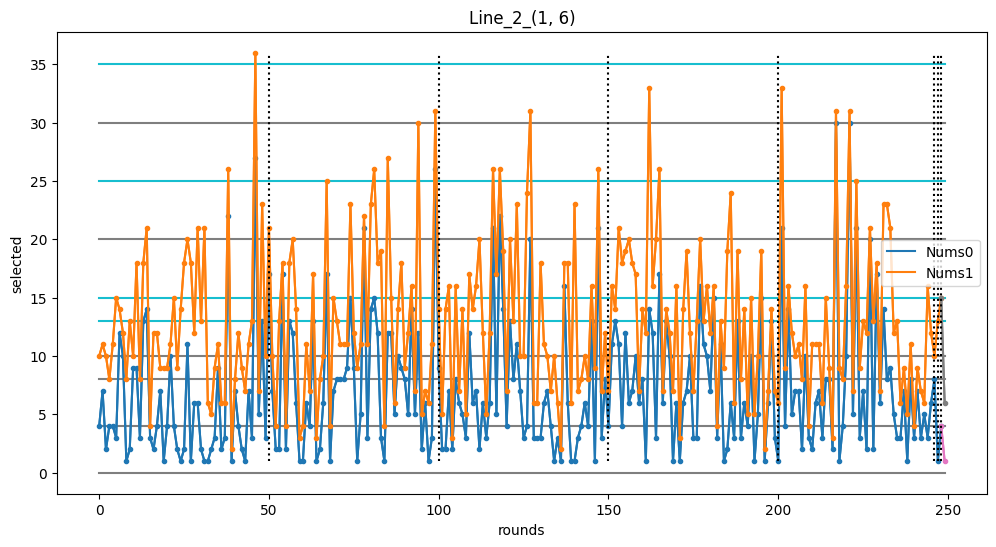

최소 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
최대 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
사용자 선택       = 6
마지막 값        = 15
마지막 값들       = [8, 16, 31, 7, 25, 9, 13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 6, 16, 12, 10, 13, 15]
자주 나오는 값(부분) = [(25, 1), (24, 2), (2, 2), (33, 2), (3, 3), (17, 3), (31, 3), (21, 3), (4, 3), (15, 3), (26, 4), (23, 4), (20, 5), (8, 5), (5, 6), (19, 6), (18, 6), (11, 6), (13, 8), (10, 8), (9, 8), (6, 9), (14, 10), (12, 11), (16, 13), (7, 15)]
자주 나오는 값(전체) = [(30, 2), (34, 2), (33, 2), (27, 3), (22, 4), (2, 4), (31, 4), (24, 5), (25, 7), (26, 8), (23, 8), (20, 9), (3, 10), (19, 10), (17, 12), (5, 12), (8, 16), (4, 16), (21, 17), (13, 18), (15, 19), (16, 20), (14, 20), (12, 21), (9, 23), (18, 23), (10, 24), (6, 25), (11, 26), (7, 27)]
마지막 수의 앞과 뒤 #1 = [[6, 15, 6], [7, 15, 7], [9, 15, 25], [9, 15, 16], [25, 1

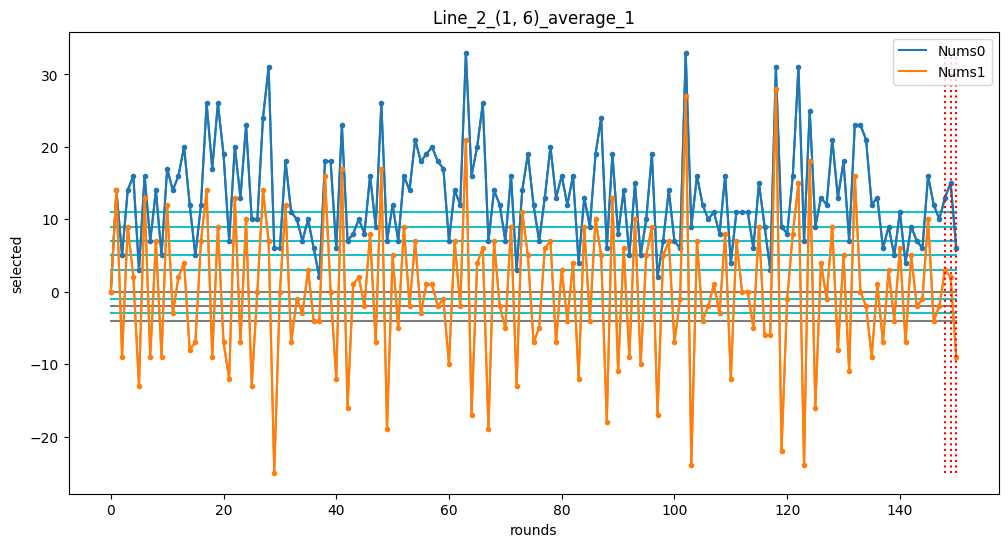

________________________________________
최소값          = [8.2, 8.5, 8.6, 8.9, 9.0, 9.3, 9.4, 9.7, 9.8, 9.9, 10.0, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 11.0, 11.1]
최대값          = [15.5, 15.6, 15.7, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.3, 17.4, 17.6, 17.9, 18.3]
마지막          = [15.6, 14.8, 16.4, 16.0, 16.3, 16.3, 15.7, 14.5, 13.7, 13.0, 12.7, 11.3, 9.7, 8.2, 8.6, 8.5, 8.9, 9.3, 10.3, 9.8]


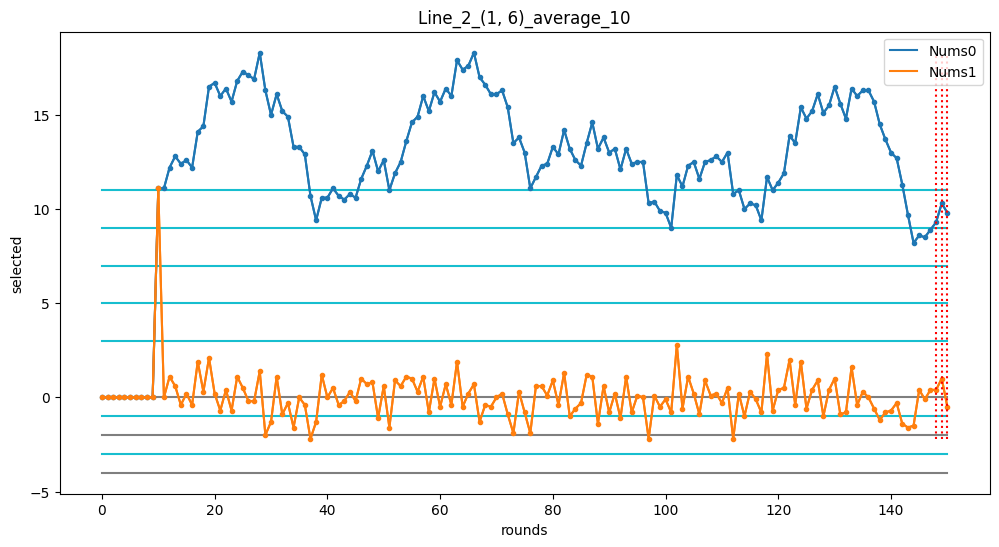

________________________________________
최소값          = [10.9, 10.95, 11.0, 11.05, 11.1, 11.15, 11.25, 11.3, 11.35, 11.4, 11.5, 11.6, 11.8, 11.85, 11.9, 11.95, 12.0, 12.05, 12.1, 12.15]
최대값          = [14.95, 15.0, 15.05, 15.2, 15.3, 15.5, 15.55, 15.6, 15.7, 15.75, 15.8, 15.85, 15.9, 16.05, 16.1, 16.15, 16.35, 16.4, 16.5, 16.6]
마지막          = [13.75, 14.35, 14.95, 15.7, 15.55, 15.75, 15.9, 14.8, 14.6, 14.75, 14.15, 13.05, 13.05, 12.1, 12.45, 12.4, 12.3, 11.9, 12.0, 11.4]


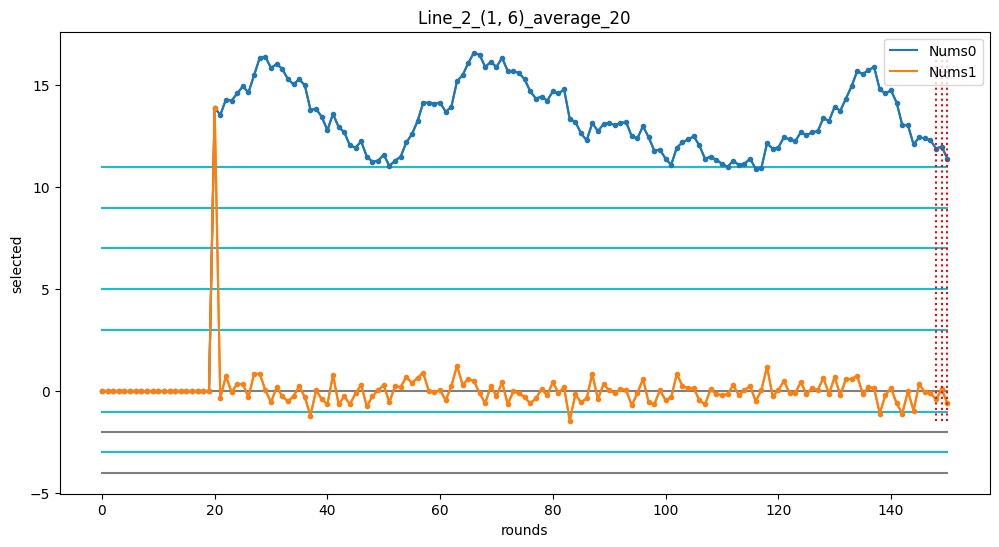

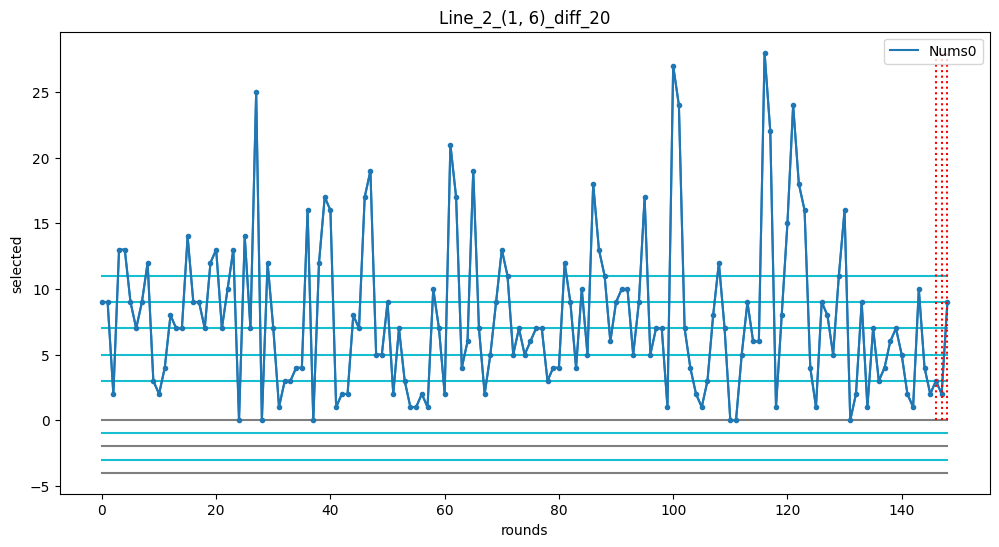

In [12]:
Round = 2
############################
selected = Round - 1
ext_data = 6

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [0, 4, 8, 10, 13, 15, 20, 25, 30, 35]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250

vline_poses = []
for i in range(1, (len(row_list_none_last[selected]) - start_pos_0) // 50 +1):
    vline_poses.append((50*i, 0, 45))

num_data=row_list_none_last[selected]

show_after = False
show_before = True
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums,
                   vline_poses=vline_poses
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

before   = 6
ext_data = 12
after    = 25


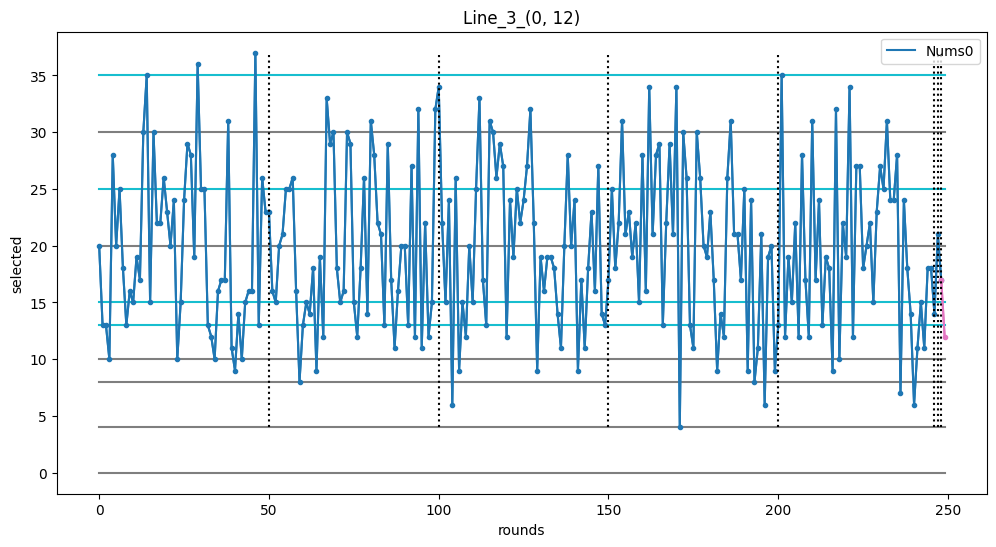

최소 값         = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
최대 값         = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
사용자 선택       = 12
마지막 값        = 17
마지막 값들       = [22, 19, 34, 12, 27, 27, 18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 11, 18, 18, 14, 21, 17]
자주 나오는 값(부분) = [(4, 1), (8, 1), (35, 1), (10, 1), (7, 1), (32, 2), (6, 3), (30, 3), (29, 3), (16, 3), (34, 4), (23, 4), (26, 5), (25, 5), (31, 5), (14, 5), (28, 5), (20, 6), (13, 6), (27, 6), (11, 6), (15, 7), (9, 7), (12, 7), (21, 7), (17, 8), (18, 8), (22, 9), (24, 9), (19, 10)]
자주 나오는 값(전체) = [(37, 2), (33, 3), (35, 3), (8, 3), (6, 3), (34, 6), (27, 7), (32, 8), (10, 9), (9, 9), (26, 12), (31, 12), (21, 13), (14, 13), (29, 13), (23, 14), (25, 14), (30, 14), (11, 15), (28, 17), (20, 17), (24, 17), (22, 18), (15, 19), (16, 20), (18, 20), (17, 20), (19, 22), (1

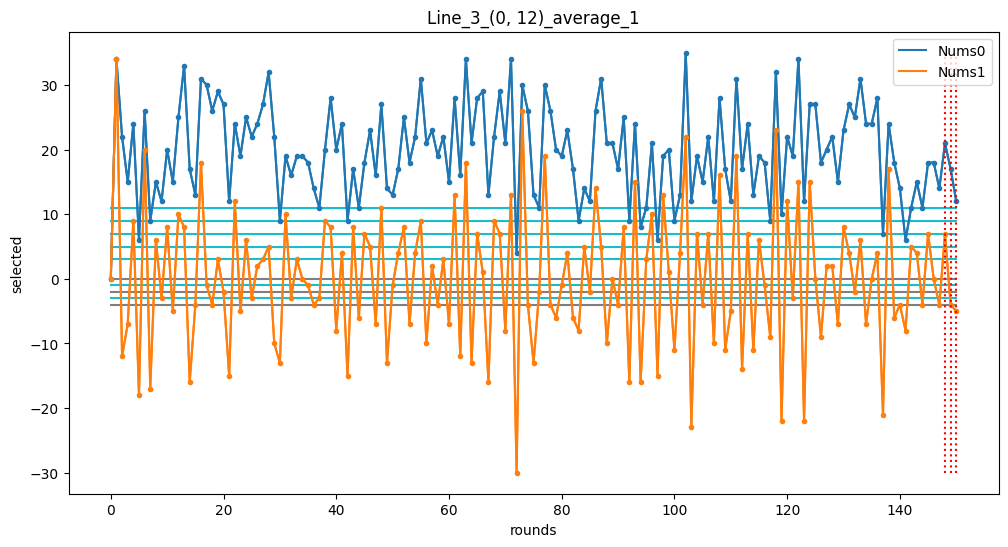

________________________________________
최소값          = [14.0, 14.2, 14.3, 14.5, 14.6, 14.9, 15.2, 15.4, 15.8, 16.0, 16.1, 16.3, 16.4, 16.5, 16.6, 16.7, 16.9, 17.0, 17.1, 17.2]
최대값          = [22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.4, 23.5, 23.6, 23.8, 23.9, 24.1, 24.2, 24.3, 24.5, 24.6, 24.7]
마지막          = [22.5, 21.6, 23.5, 23.2, 22.9, 23.9, 22.6, 22.8, 23.1, 22.2, 20.1, 18.7, 17.1, 15.8, 15.2, 14.2, 14.9, 14.6, 14.5, 14.3]


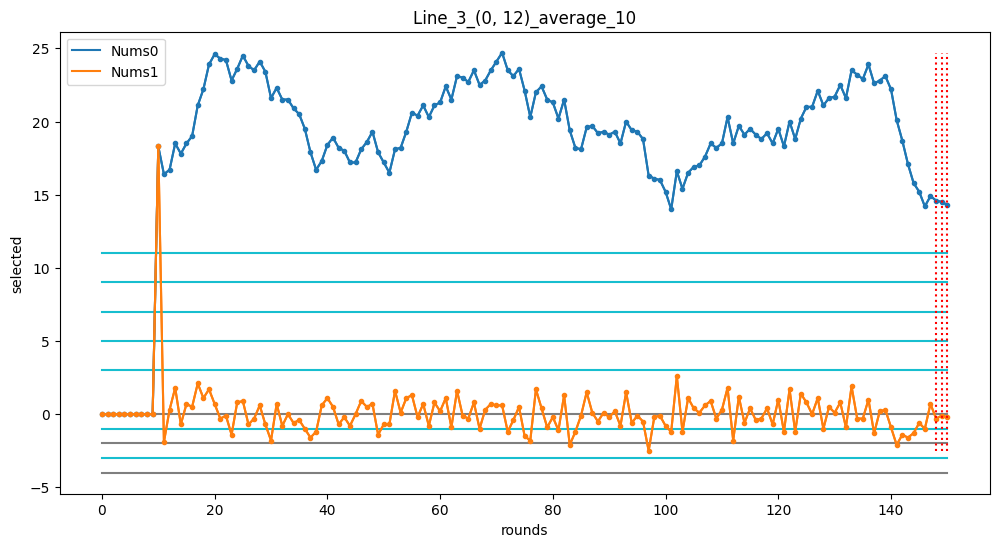

________________________________________
최소값          = [16.65, 16.85, 16.95, 17.1, 17.15, 17.3, 17.55, 17.6, 17.65, 17.7, 17.8, 17.9, 17.95, 18.0, 18.05, 18.1, 18.15, 18.2, 18.25, 18.35]
최대값          = [21.65, 21.7, 21.8, 21.9, 21.95, 22.15, 22.25, 22.3, 22.35, 22.4, 22.45, 22.5, 22.6, 22.7, 22.85, 23.1, 23.15, 23.3, 23.55, 23.65]
마지막          = [20.4, 20.8, 21.15, 21.7, 21.95, 22.45, 22.35, 21.95, 22.35, 21.95, 21.3, 20.15, 20.3, 19.5, 19.05, 19.05, 18.75, 18.7, 18.8, 18.25]


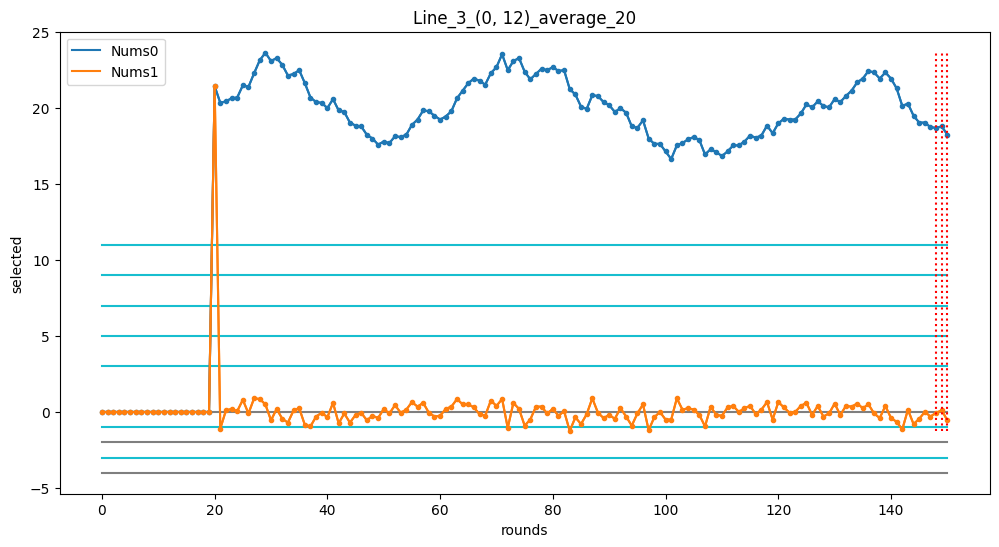

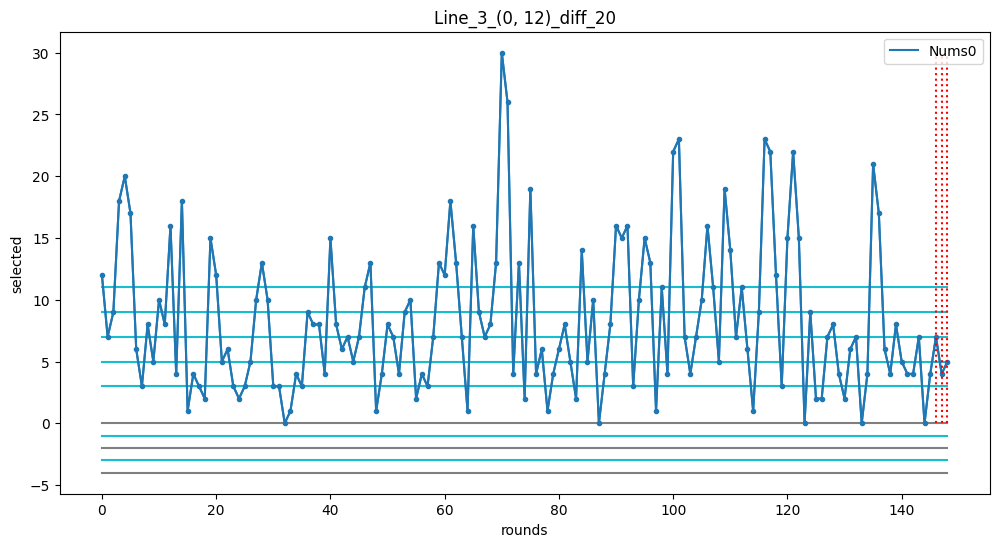

In [13]:
Round = 3
############################
selected = Round - 1
ext_data = 12

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [0, 4, 8, 10, 13, 15, 20, 25, 30, 35]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = False
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

vline_poses = []
for i in range(1, (len(row_list_none_last[selected]) - start_pos_0) // 50 +1):
    vline_poses.append((50*i, 0, 45))

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums,
                   vline_poses=vline_poses
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

In [14]:
Round = 4
############################
selected = Round - 1
ext_data = 26

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [10, 13, 15, 20, 25, 30, 35, 40, 45]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = True
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

vline_pose s= []
for i in range(1, (len(row_list_none_last[selected]) - start_pos_0) // 50 +1):
    vline_poses.append((50*i, 0, 45))

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums,
                   vline_poses=vline_poses
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

SyntaxError: invalid syntax (562268090.py, line 30)

In [ ]:
Round = 5
############################
selected = Round - 1
ext_data = 37

before = candidate[selected-1]
after = candidate[selected+1]

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 50
helper_line_nums_1 = [10, 12, 15, 20, 25, 28, 30, 33, 35, 40, 45]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = True
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

vline_poses = []
for i in range(1, (len(row_list_none_last[selected]) - start_pos_0) // 50 +1):
    vline_poses.append((50*i, 0, 45))

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums,
                   vline_poses=vline_poses
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

In [ ]:
Round = 6
############################
selected = Round - 1
ext_data = 45

before = candidate[selected-1]
after = 46

print(f"before   = {before}")
print(f"ext_data = {ext_data}")
print(f"after    = {after}")

wanted_data_length = 30
helper_line_nums_1 = [17, 20, 25, 30, 35, 40, 44, 45]
# helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 3, 5, 7, 9, 11]
# lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
lengths = [1, 10, 20]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]
show_after = False
show_before = False
show_average = True
min_max_last_num_length = 20
show_diff_nums = True

ext_datas = get_extdatas(show_before, show_after, before, ext_data, after)

vline_poses = []
for i in range(1, (len(row_list_none_last[selected]) - start_pos_0) // 50 +1):
    vline_poses.append((50*i, 0, 45))

get_information_v2(selected=selected,
                   last_results=row_list_none_last,
                   ext_datas=ext_datas,
                   wanted_data_length=wanted_data_length,
                   helper_line_nums_1=helper_line_nums_1,
                   helper_line_nums_2=helper_line_nums_2,
                   show_diff=True,
                   lengths=lengths,
                   start_pos_0=start_pos_0,
                   start_pos_1=start_pos_1,
                   show_after=show_after,
                   show_before=show_before,
                   show_average=show_average,
                   min_max_last_num_length=min_max_last_num_length,
                   show_diff_nums=show_diff_nums,
                   vline_poses=vline_poses
                   )
candidate[selected] = ext_data
update_candidated(candidated={selected: ext_data}, version=version)

In [ ]:
print(candidate)

In [15]:
candidates = [[1, 3, 21, 28, 33, 40]
              ]

lasts = [
    [1, 16, 22, 23, 34, 38],
    [8, 16, 18, 19, 30, 33],
    [6, 9, 16, 19, 32, 36]
    ]

reals = [[3, 16, 18, 24, 40, 44],
         [5, 6, 11, 27, 43, 44]]

In [19]:
def draw_nums(ext_datas, is_pre_data=False, fig_size=(15, 8)):
    show_cols = [0, 1, 2, 3, 4, 5]
    show_label = False
    show_cnt = 100
    start_pos = row_length - show_cnt
    show_data = []
    for i in range(6):
        end_pos = -1 if is_pre_data else len(row_list_none_last[i])
        show_data.append(row_list_none_last[i][start_pos:end_pos])
    print(ext_datas)
    draw_scatter(show_data, f'line num : {key}', True, True, show_cols, ext_datas, show_label, helper_line_nums=[10, 20, 30, 40], fig_size=fig_size)

print('current work', datetime.now())

current work 2025-08-07 17:19:49.588294
